# CAP-368 – Introdução à Teoria de Sistemas Dinâmicos

## Série de Exercícios II

1. Use o software Mathematica e o pacote associado DynPack para reproduzir todas as figuras vistas até agora nos capítulos 1 do H,S&D.
2. Resuma a seção 1.5 do livro do H,S&D.
3. Empreenda a Exploração I, seção 1.6 do H,S&D.
4. Exercícios do capítulo I: 1, 2, 3, 4, 5, 7, 10, 16. (Use o DynPack, quando aplicável).
5. Exercício do capítulo II: 1.

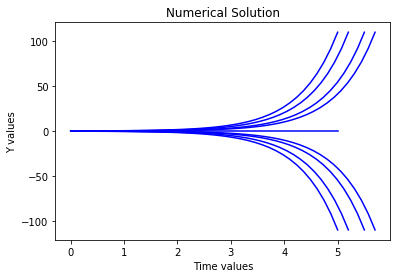

In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def model(y,t,alpha):
    f0 = alpha * y
    return f0

def plotModel(ic,alpha,t):
    tn = np.linspace(t, 5+t, 40)
    y1 = odeint(model, ic, tn, args=(alpha,))
    plt.plot(tn, y1, color='b')


k = 1.4
plotModel(-0.1,k,0)
plotModel(-0.1,k,0.2)
plotModel(-0.1,k,.5)
plotModel(-0.1,k,.7)
plotModel(0.0,k,0)
plotModel(.1,k,0)
plotModel(.1,k,.2)
plotModel(.1,k,.5)
plotModel(.1,k,.7)

plt.title('Numerical Solution')
plt.xlabel('Time values')
plt.ylabel('Y values')
# Save figure using 300 dots per inch42
plt.savefig("fig1.1.png", dpi=300)
plt.show()  # Show on screen


Figure 1.1 The solution graphs and phase line for x = ax for a > 0. Each graph represents a particular solution.

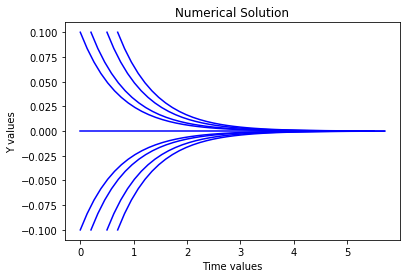

In [75]:
k = -1.4
plotModel(-0.1,k,0)
plotModel(-0.1,k,0.2)
plotModel(-0.1,k,.5)
plotModel(-0.1,k,.7)
plotModel(0.0,k,0)
plotModel(.1,k,0)
plotModel(.1,k,.2)
plotModel(.1,k,.5)
plotModel(.1,k,.7)

plt.title('Numerical Solution')
plt.xlabel('Time values')
plt.ylabel('Y values')
# Save figure using 300 dots per inch42
plt.savefig("fig1.2.png", dpi=300)
plt.show()  # Show on screen

Figure 1.2 The solution graphs and phase line for x = ax for a < 0.

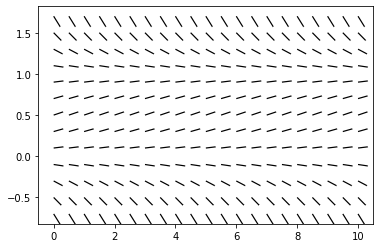

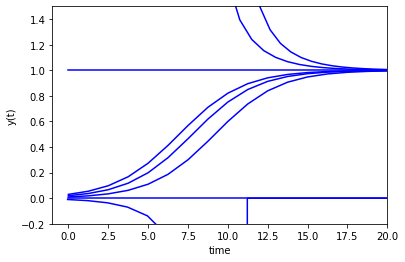

In [18]:
times = np.linspace(0, 10,  21)
x = np.linspace(-0.7,1.7, 13)
T, X = np.meshgrid(times, x)   # make a grid that roughly matches the Strogatz grid
alpha=0.5
dxdt = alpha*X*(1-X)            
dt = .7*np.ones(X.shape)  
dx = dxdt * dt            

plt.quiver(T, X, dt, dx, headwidth=0., angles='xy', scale=15.)
plt.show()

def model(y,t,alpha):
    dydt = (alpha * y*(1-y))
    return dydt

def plotModel(ic,alpha,t):
    tn = np.linspace(t, 25, 21)
    y1 = odeint(model, ic, tn, args=(alpha,))
    plt.plot(tn, y1, color='b')

k = .5
plotModel(1.7,k,10)
plotModel(1.5,k,12)
plotModel(1.,k,0)
plotModel(0.01,k,0)
plotModel(0.02,k,0)
plotModel(0.03,k,0)
plotModel(0.0,k,0)
plotModel(-0.01,k,-0.05)

plt.ylim(top=1.5) 
plt.ylim(bottom=-0.2)  
plt.xlim(left=-1) 
plt.xlim(right=20)  
plt.xlabel('time')
plt.ylabel('y(t)')
plt.savefig("fig1.3.png", dpi=300)
plt.show()

Figure 1.3 The slope field, solution graphs, and phase line for x = ax(1 – x).

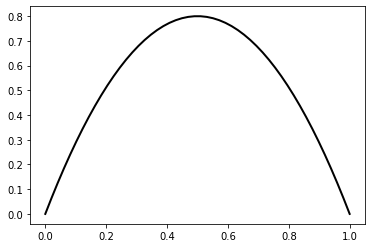

In [88]:
def logistic(r, x):
        return r * x * (1 - x)
    
def plot_system(r):
    t = np.linspace(0, 1)
    plt.plot(t, logistic(r, t), 'k', lw=2)
    plt.savefig("fig1.4.png", dpi=300)
    plt.show()
    
r=3.2
plot_system(r)

Figure 1.4 The graph of the function f(x)=ax(1 – x) with a = 3.2.

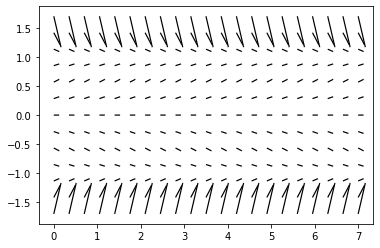

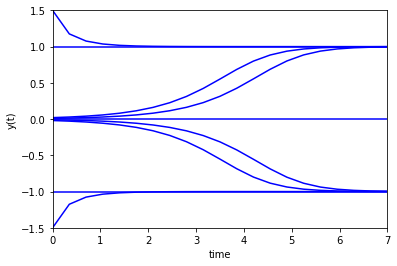

In [141]:
times = np.linspace(0, 7,  21)
x = np.linspace(-1.7,1.7, 13)
T, X = np.meshgrid(times, x)   # make a grid that roughly matches the Strogatz grid
dxdt = X-(X**3)            # the equation of interest
dt = .5*np.ones(X.shape)  # a constant value (.5 is just so segments don't run into each other -- given spacing of times array
dx = dxdt * dt            # given dt, now calc dx for the line segment

plt.quiver(T, X, dt, dx, headwidth=0., angles='xy', scale=15.)
plt.show()

def model(y,t):
    dydt = y-(y**3)
    return dydt

def plotModel(ic,t):
    tn = np.linspace(t, 7, 21)
    y1 = odeint(model, ic, tn)
    plt.plot(tn, y1, color='b')

plotModel(1.5,0)
plotModel(1.,0)
plotModel(0.01,0)
plotModel(0.02,0)
plotModel(0.0,0)
plotModel(-0.01,0)
plotModel(-0.02,0)
plotModel(-1,0)
plotModel(-1.5,0)

plt.ylim(top=1.5)  
plt.ylim(bottom=-1.5)  
plt.xlim(left=0)  
plt.xlim(right=7)  
plt.xlabel('time')
plt.ylabel('y(t)')
plt.savefig("fig1.5.png", dpi=300)
plt.show()

Figure 1.5 The slope field, solution graphs, and phase line for x = x – x3.

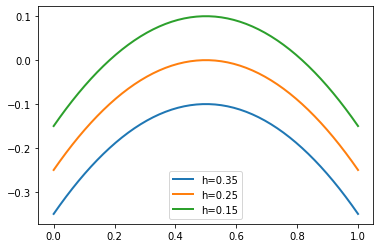

In [146]:
def model(h, x):
    return x*(1-x)-h 
    
def plot_system(h):
    t = np.linspace(0, 1)
    plt.plot(t, model(h, t), lw=2,label='h='+str(h))

    
h=1/4
plot_system(h+.1)
plot_system(h)
plot_system(h-.1)
plt.legend()
plt.savefig("fig1.6.png", dpi=300)
plt.show()

Figure 1.6 The graphs of the function fh(x)=x(1 – x)–h.

In [ ]:
def model(y,h):
    return y*(1-y)-h 

n = 20
r = np.linspace(0, 1, n)
iterations = 10000
last = 50
x = 1e-5 * np.ones(n)

for i in range(iterations):
    x = model(x,r)
    line, = plt.plot(r, x, '.k', alpha=0.50,lw=1.5, picker=5)
#plt.set_xlim(0, 1)

# Save figure using 300 dots per inch42
plt.savefig("fig1.1.png", dpi=300)
plt.show()  # Show on screen


c:\users\laeti\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  
